In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13
### <u>IMPORTANT NOTE:</u> All students must complete HW5 - this homework grade cannot be dropped as part of the lowest homework grade drop policy.

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

Metric: Accuracy
Accuracy: 0.820

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
from hashlib import sha1
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16
from sklearn.compose import ColumnTransformer, make_column_transformer


from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

I prefer the kaggle dataset, since it has much more options to play with numerically. Limit_bal, pay amounts, and bill amounts all give a few nice places to play with stuff numecially.

Most of this stuff makes sense. LIMIT_BAL is the maximum balance, PAY_AMT and BILL_AMT is how much money was recently paid and billed respectively. PAY_n is the months since last payment. The first 2 are likely going to be numeric columns, while pay will be an ordinal collumn. SEX, AGE, and MARRIAGE are self explanatory. I don't understand why there are 2 unknown's for education though. Oh well, will probably just replace both of those with imputed values.

In [3]:
defaults_df = pd.read_csv("data/UCI_Credit_Card.csv", index_col=0)


y = defaults_df['default.payment.next.month']

X = defaults_df.copy()

X = X.drop('default.payment.next.month', axis=1)



X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

Okay, the first thing that struct me was just how large the numbers are. How do more than half the people here have a budget limit that high?

That's a sign to check units. Turns out, this isn't in dollars, but in "New Taiwan" dollars. (Guess that's what the NT stands for). I did a conversion, and got much more reasonable numbers. At current conversion rates, the median limit is actually quite close to my own credit limit.

Now, after conversions, the data is more reasonable. However, on a purely macro scale, it's still concerning to see the median payment only equal 1/10th of the median bill.

When plotting bill by payment, you see what you expect: people with more bills do pay more. However, there are a handful of poor saps with fairly large bills to make, but don't really seem to be making them. I used a log scale, because otherwise, most points are clustered around the Y axis.

I'm actually quite confused by the "education" graphs. There seem to be a lot of samples with a label of 0, even though the documentation doesn't mention a zero label? Also, why are there two distinct "unknown" labels (5 and 6).

Even sticking with what's clear (1 is grad, 2 is undergrad, 3 is high school), we do seem to get some interesting information. One key insight is that people with only high school seem to make much lower payments, despite having similar average bills.

And plotting a scatterplot of bills by age (broken down into year bins) shows something interesting. People in their early 20s seem to have little debt, acumulate it over thier 20's, and pay it off time, even if some high-debt stragglers remain. Except for that poor 80 year old. What's their story, I wonder?

In [5]:
CONVERSION = 0.046

np.median(X_train['LIMIT_BAL'] * CONVERSION)

np.float64(6440.0)

In [6]:

np.median(X_train[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]] * CONVERSION)

np.float64(87.39999999999999)

In [7]:
np.median(X_train[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6' ]] * CONVERSION)

np.float64(884.028)

/home/roy/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/roy/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


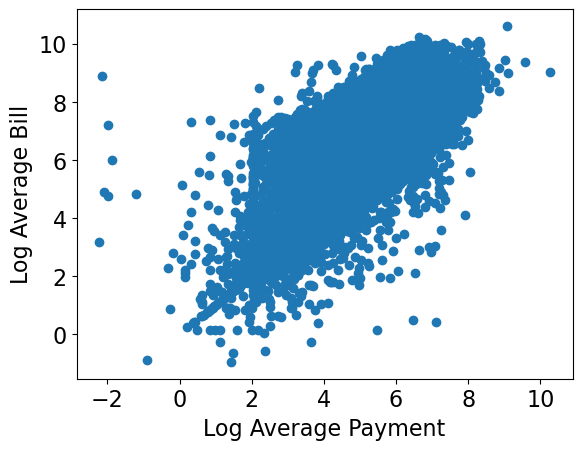

In [8]:
X_train["MEAN_PAY"] = X_train.loc[:, ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]].mean(axis = 1)

X_train["MEAN_BILL"] = X_train.loc[:, ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6' ]].mean(axis = 1)
plt.scatter(np.log(X_train["MEAN_PAY"] * CONVERSION), np.log(X_train["MEAN_BILL"] * CONVERSION))

plt.xlabel("Log Average Payment")
plt.ylabel("Log Average Bill");

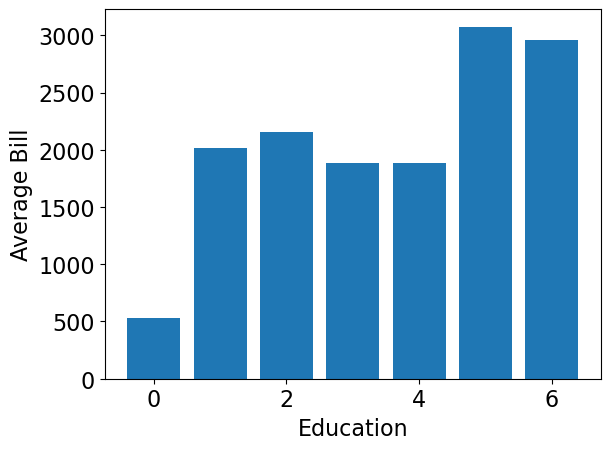

In [9]:
educ_types = len(set(X_train['EDUCATION']))
bill_by_educ = []
avg_bill_by_educ = [0]*educ_types
# make a list for each education set
for i in range(educ_types):
    bill_by_educ.append([])

for i in range(len(X_train)):
    educ = int(X_train.iloc[i]['EDUCATION'])
    bill_by_educ[educ].append(X_train.iloc[i]['MEAN_BILL'])


for i in range(educ_types):
    avg_bill_by_educ[i] = np.mean(bill_by_educ[i]) * CONVERSION

plt.bar(range(educ_types), avg_bill_by_educ)

plt.xlabel("Education")
plt.ylabel("Average Bill");


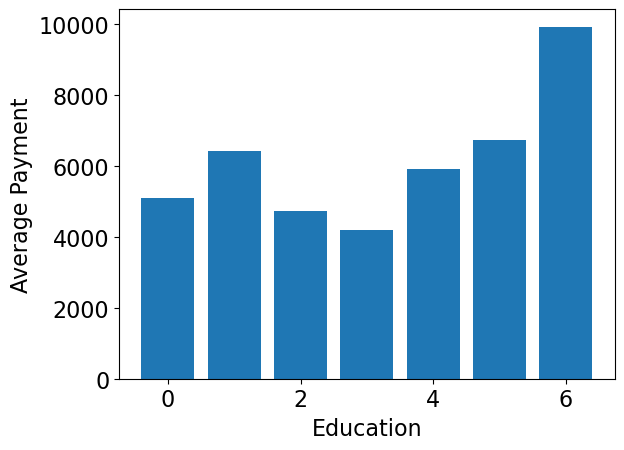

In [10]:
educ_types = len(set(X_train['EDUCATION']))
bill_by_educ = []
avg_bill_by_educ = [0]*educ_types
# make a list for each education set
for i in range(educ_types):
    bill_by_educ.append([])

for i in range(len(X_train)):
    educ = int(X_train.iloc[i]['EDUCATION'])
    bill_by_educ[educ].append(X_train.iloc[i]['MEAN_PAY'])


for i in range(educ_types):
    avg_bill_by_educ[i] = np.mean(bill_by_educ[i])

plt.bar(range(educ_types), avg_bill_by_educ)

plt.xlabel("Education")
plt.ylabel("Average Payment");


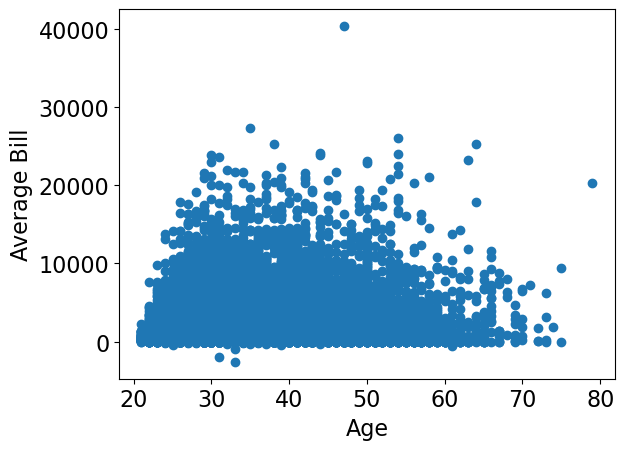

In [11]:
plt.scatter((X_train["AGE"]), (X_train["MEAN_BILL"] * CONVERSION))

# I swear this isn't a histogram...
plt.xlabel("Age")
plt.ylabel("Average Bill");

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

In [12]:
# Done in previous segment, making mean payments and mean bill.

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [13]:
set(X_train['MARRIAGE'])

{0, 1, 2, 3}

In [14]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer


# there seem to be no "?", None's, or Nan's in the data.

# The only thing worth doing in terms of imputation is replacing all the unknowns from "education" and marriage with the most common.

X_train['EDUCATION'] = X_train['EDUCATION'].replace([0, 4, 5, 6], np.nan)
X_test['EDUCATION'] = X_test['EDUCATION'].replace([0, 4, 5, 6], np.nan)


X_train['MARRIAGE'] = X_train['MARRIAGE'].replace([0, 3], np.nan)
X_test['MARRIAGE'] = X_test['MARRIAGE'].replace([0, 3], np.nan)

numeric_transformer = StandardScaler()
# all ordinal things are already in a nice order for us, just have to fix "Educ".
ordinal_transformer =make_pipeline( SimpleImputer(strategy='most_frequent'))
categorical_transformer = make_pipeline(OneHotEncoder(categories='auto', handle_unknown='ignore', sparse_output=False))
binary_transformer = OneHotEncoder(categories=[[1, 2]], dtype=int, drop='if_binary')

ordinal_features = ['EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
categorical_features = ['MARRIAGE']
binary_features = ['SEX']
numerical_features = [c for c in X_train.columns if not (c in ordinal_features or c in categorical_features or c in binary_features)]


preprocessor = make_column_transformer((numeric_transformer, numerical_features), 
                                       (ordinal_transformer, ordinal_features), (binary_transformer, binary_features), 
                                       (categorical_transformer,categorical_features)) 

preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6', 'MEAN_PAY', 'MEAN_BILL']),
                                ('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3',
                                  'PAY_4', 'PAY_5', 'PAY_6']),
                                ('onehotencoder',
                                 OneHotEncoder(categories=[[1, 2]],
                                               drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['SEX']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['MARRIAGE'])])

In [15]:
transformed_df = pd.DataFrame(preprocessor.fit_transform(X_train))
n_new_cols =  len(transformed_df.columns) - len(X_train.columns)

X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MEAN_PAY,MEAN_BILL
ID,,,,,,,,,,,,,,,,,,,,,
16396,320000.0,2,1.0,2.0,36,0,0,0,0,0,...,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,3505.166667,19868.833333
21449,440000.0,2,1.0,2.0,30,-1,-1,-1,0,0,...,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,47954.333333,88137.666667
20035,160000.0,2,3.0,1.0,44,-2,-2,-2,-2,-2,...,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-18.000000
25756,120000.0,2,2.0,1.0,30,0,0,0,0,0,...,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,3356.000000,88447.000000
1439,50000.0,1,2.0,2.0,54,1,2,0,0,0,...,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,1100.000000,34180.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28637,380000.0,2,2.0,1.0,37,0,0,0,0,0,...,15949.0,15556.0,1204.0,1300.0,1242.0,1900.0,0.0,3000.0,1441.000000,14478.166667
17731,360000.0,2,1.0,1.0,54,1,-2,-2,-1,0,...,2580.0,6941.0,0.0,0.0,2580.0,0.0,6941.0,0.0,1586.833333,2016.833333
28031,50000.0,2,3.0,1.0,29,0,0,0,0,0,...,8824.0,9009.0,2002.0,2000.0,1530.0,1000.0,327.0,329.0,1198.000000,33267.500000


In [16]:
# Taken from Homework 3

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)




<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [17]:
results_dict = dict()

In [18]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(random_state = 123)
dummy_pipe = make_pipeline(preprocessor, dummy)

results_dict["dummy"] = mean_std_cross_val_scores(
    dummy_pipe, X_train, y_train, cv=5, return_train_score=True
)

results_dict['dummy']

fit_time       0.028 (+/- 0.011)
score_time     0.007 (+/- 0.000)
test_score     0.777 (+/- 0.000)
train_score    0.777 (+/- 0.000)
dtype: object

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

The best C is the default value of 1, and the test-score it gave is actually exactly the same as the train score (0.81), even having the same as the same standard deviation (0.002).

In [19]:
lr = LogisticRegression(max_iter=1000, random_state=123)

linear_pipe = make_pipeline(preprocessor, lr)



params = {
    'logisticregression__C': 10.0 ** np.arange(-1.5, 2, 0.5), 
}

grid_search = GridSearchCV(estimator = linear_pipe, param_grid = params, cv = 5)

grid_search.fit(X_train, y_train)

print("Best Score: {}".format(grid_search.best_score_))
print("Best C: {}".format(grid_search.best_params_['logisticregression__C']))

Best Score: 0.8096666666666665
Best C: 1.0


In [20]:
lr = LogisticRegression(max_iter=1000, random_state=123, C=1)

linear_pipe = make_pipeline(preprocessor, lr)

results_dict["linear"] = mean_std_cross_val_scores(
    linear_pipe, X_train, y_train, cv=5, return_train_score=True
)

results_dict["linear"] 

fit_time       0.082 (+/- 0.023)
score_time     0.008 (+/- 0.002)
test_score     0.810 (+/- 0.002)
train_score    0.810 (+/- 0.002)
dtype: object

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

The 3 models I tried were decision tree, KNN, and random forest.

All 3 showed signs of overfitting, in the sense that they had much higher training accuracy than test accuracy, with all having higher training accuracy than the dummy model and all but random forest having lower test accuracy. However, it's worth remembering that random forests tend to still perform fine on val data, even as its training accuracy approaches 100, so it's likely fine for now. I'll play around with hyperparameters later.

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

decision_tree = DecisionTreeClassifier(random_state =123)



tree_pipe = make_pipeline(preprocessor, decision_tree)

results_dict["tree"] = mean_std_cross_val_scores(
    tree_pipe, X_train, y_train, cv=5, return_train_score=True
)

results_dict["tree"] 


fit_time       0.491 (+/- 0.026)
score_time     0.007 (+/- 0.000)
test_score     0.731 (+/- 0.008)
train_score    0.999 (+/- 0.000)
dtype: object

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_pipe = make_pipeline(preprocessor, decision_tree)

results_dict["knn"] = mean_std_cross_val_scores(
    knn_pipe, X_train, y_train, cv=5, return_train_score=True
)

results_dict["knn"] 

fit_time       0.486 (+/- 0.022)
score_time     0.007 (+/- 0.000)
test_score     0.731 (+/- 0.008)
train_score    0.999 (+/- 0.000)
dtype: object

In [23]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 123)


forest_pipe = make_pipeline(preprocessor, forest)

results_dict["forest"] = mean_std_cross_val_scores(
    forest_pipe, X_train, y_train, cv=5, return_train_score=True
)

results_dict["forest"] 


fit_time       5.451 (+/- 0.221)
score_time     0.057 (+/- 0.002)
test_score     0.814 (+/- 0.006)
train_score    0.999 (+/- 0.000)
dtype: object

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

Neither the random forest nor the linear model seem to improve substantively when using feature selection; the best case is only better by less than 1% in both cases. For that reason, and to avoid selecting too strongly on the validation sets, I'll conitnue without feature selection.

In [24]:

# adapted from https://www.kaggle.com/code/magedmallek/feature-selection-explained-rfecv

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

rfecv = RFECV(
    estimator=forest,
    step=1,
    min_features_to_select=1,
    cv=6,
    scoring="accuracy",
    n_jobs=-1,
)

preprocessor.fit(X_train)

feature_names = preprocessor.get_feature_names_out()

transformed_train_X = preprocessor.transform(X_train)

rfecv.fit(transformed_train_X, y_train)

selected_mask = rfecv.support_

selected_features = feature_names[selected_mask]

print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Optimal features: {list(selected_features)}")

Optimal number of features: 24
Optimal features: ['standardscaler__LIMIT_BAL', 'standardscaler__AGE', 'standardscaler__BILL_AMT1', 'standardscaler__BILL_AMT2', 'standardscaler__BILL_AMT3', 'standardscaler__BILL_AMT4', 'standardscaler__BILL_AMT5', 'standardscaler__BILL_AMT6', 'standardscaler__PAY_AMT1', 'standardscaler__PAY_AMT2', 'standardscaler__PAY_AMT3', 'standardscaler__PAY_AMT4', 'standardscaler__PAY_AMT5', 'standardscaler__PAY_AMT6', 'standardscaler__MEAN_PAY', 'standardscaler__MEAN_BILL', 'pipeline-1__EDUCATION', 'pipeline-1__PAY_0', 'pipeline-1__PAY_2', 'pipeline-1__PAY_3', 'pipeline-1__PAY_4', 'pipeline-1__PAY_5', 'pipeline-1__PAY_6', 'onehotencoder__SEX_2']


In [25]:
rfecv.cv_results_

{'mean_test_score': array([0.66728571, 0.7392381 , 0.76119048, 0.79461905, 0.80471429,
        0.8087619 , 0.80780952, 0.811     , 0.81195238, 0.81004762,
        0.81080952, 0.81161905, 0.812     , 0.81228571, 0.8127619 ,
        0.81442857, 0.81295238, 0.81542857, 0.81395238, 0.81466667,
        0.81261905, 0.81295238, 0.81304762, 0.81633333, 0.8132381 ,
        0.81533333, 0.81633333]),
 'std_test_score': array([0.00714048, 0.00504852, 0.00343419, 0.01394783, 0.00539778,
        0.00476857, 0.00350962, 0.00679486, 0.00574614, 0.006241  ,
        0.00372678, 0.00519986, 0.00480363, 0.00381904, 0.00504582,
        0.00323985, 0.00391983, 0.00381547, 0.00251481, 0.00428148,
        0.00436566, 0.00395095, 0.00464426, 0.00329674, 0.00502691,
        0.00519462, 0.00538937]),
 'split0_test_score': array([0.67885714, 0.748     , 0.76342857, 0.79285714, 0.79514286,
        0.80342857, 0.80314286, 0.80114286, 0.80542857, 0.79942857,
        0.80542857, 0.80314286, 0.80685714, 0.80742857, 0.

In [26]:
rfecv_linear = RFECV(
    estimator=lr,
    step=1,
    min_features_to_select=1,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)



rfecv_linear.fit(transformed_train_X, y_train)

selected_mask = rfecv_linear.support_

selected_features = feature_names[selected_mask]

print(f"Optimal number of features: {rfecv_linear.n_features_}")
print(f"Optimal features: {list(selected_features)}")
rfecv_linear.cv_results_

Optimal number of features: 1
Optimal features: ['pipeline-1__PAY_0']


{'mean_test_score': array([0.81838095, 0.8132381 , 0.81280952, 0.81247619, 0.81233333,
        0.81061905, 0.80766667, 0.80666667, 0.80809524, 0.80880952,
        0.80880952, 0.80909524, 0.8097619 , 0.80933333, 0.80933333,
        0.80919048, 0.80938095, 0.80947619, 0.80971429, 0.80985714,
        0.80942857, 0.80938095, 0.80947619, 0.80947619, 0.80942857,
        0.80957143, 0.80961905]),
 'std_test_score': array([0.00506287, 0.00338933, 0.00389604, 0.00398865, 0.00417693,
        0.0031175 , 0.0028706 , 0.00354114, 0.00229857, 0.00278072,
        0.00174964, 0.00157503, 0.00226879, 0.00365893, 0.00337189,
        0.00301771, 0.00278724, 0.00256613, 0.00256171, 0.00247711,
        0.00200113, 0.00194365, 0.00199432, 0.00199432, 0.00205701,
        0.00198292, 0.00199546]),
 'split0_test_score': array([0.81190476, 0.80833333, 0.80761905, 0.80738095, 0.80666667,
        0.80642857, 0.80642857, 0.80619048, 0.80904762, 0.81071429,
        0.81071429, 0.81071429, 0.8102381 , 0.81      , 0.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

This didn't improve things much for random forests. However, it did seem to improve things quite a bit for the decision tree, to the point where the decision tree is now performing slightly better than the random forest. I wonder if this is why a random forest is often considered "better" than a decision tree; it's more forgiving of bad hyperparameters.

In [27]:
params = {
    'logisticregression__C': 10.0 ** np.arange(-1.5, 2, 0.5), 
}

grid_search = GridSearchCV(estimator = linear_pipe, param_grid = params, cv = 5)

grid_search.fit(X_train, y_train)

print("Best Score: {}".format(grid_search.best_score_))
print("Best C: {}".format(grid_search.best_params_['logisticregression__C']))

Best Score: 0.8096666666666665
Best C: 1.0


In [28]:
tree_params = {
    'decisiontreeclassifier__max_depth': [1, 2, 3, 4]
}

# previous params:    'decisiontreeclassifier__max_depth': [3, 5, 10, 15, 20, 25, 30]



# I wish I could do more, but my laptop would gain self awareness and kill me if I did :(

grid_search_tree = GridSearchCV(estimator = tree_pipe, param_grid = tree_params, cv = 3)

grid_search_tree.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6',
                                                                          'MEAN_PAY',
                                                                          'MEAN_BILL']),
                                                                        ('pipeline-1',
                                                                         Pipeline(steps=[('simp...
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(categories=[[1,
                                                                                                    2]],
                                                                                       drop='if_binary',
                                                                                       dtype=<class 'int'>),
                                                                         ['SEX']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['MARRIAGE'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=123))]),
             param_grid={'decisiontreeclassifier__max_depth': [1, 2, 3, 4]})

In [29]:
print("Best Score: {}".format(grid_search_tree.best_score_))
print("Best max depth: {}".format(grid_search_tree.best_params_['decisiontreeclassifier__max_depth']))

Best Score: 0.8198095238095239
Best max depth: 4


In [30]:
forest_params = {
    'randomforestclassifier__n_estimators': [500],
    'randomforestclassifier__max_depth': [5, 10, 15]
}

# previous params:     'randomforestclassifier__n_estimators': [100, 200, 500],
# previous params      'randomforestclassifier__max_depth': [None, 2, 3, 4, 10]


# I wish I could do more, but my laptop would gain self awareness and kill me if I did :(

grid_search_forest = GridSearchCV(estimator = forest_pipe, param_grid = forest_params, cv = 3)

grid_search_forest.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6',
                                                                          'MEAN_PAY',
                                                                          'MEAN_BILL']),
                                                                        ('pipeline-1',
                                                                         Pipeline(steps=[('simp...
                                                                                                    2]],
                                                                                       drop='if_binary',
                                                                                       dtype=<class 'int'>),
                                                                         ['SEX']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['MARRIAGE'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=123))]),
             param_grid={'randomforestclassifier__max_depth': [5, 10, 15],
                         'randomforestclassifier__n_estimators': [500]})

In [31]:
print("Best Score: {}".format(grid_search_forest.best_score_))
print("Best num estimators: {}".format(grid_search_forest.best_params_['randomforestclassifier__n_estimators']))
print("Best max depth: {}".format(grid_search_forest.best_params_['randomforestclassifier__max_depth']))

Best Score: 0.8177619047619048
Best num estimators: 500
Best max depth: 10


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

The two most important features in the example looked at were PAY_0 = 0 and LIMIT_BAL = 1.168. The first figure means that they aren't behind on their payments, and the second figure means they have a higher-than average limit balance. Both contributed to them being less likely to default, and that makes sense. Higher limits is a sign of good credit history, and not being behind on your latest payment is a good sign that you aren't currently struggling.. Other values play a similar role: below average mean bills, below average bill amouts, average payments made. The only factor that made the model think that it was more likely to default was a below average pay amount 5, which, again makes sense. Lower payments in a vacuum could be a sign of financial duress.

In [32]:
import shap
forest = RandomForestClassifier(random_state = 123, n_estimators=500, max_depth = 10)

print("Start")
forest_pipe.fit(X_train, y_train)

Start


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'MEAN_PAY', 'MEAN_BILL']),
                                                 ('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(str...
                                                  ['EDUCATION', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categories=[[1,
                                                                             2]],
                                                                drop='if_binary',
                                                                dtype=<class 'int'>),
                                                  ['SEX']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MARRIAGE'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=123))])

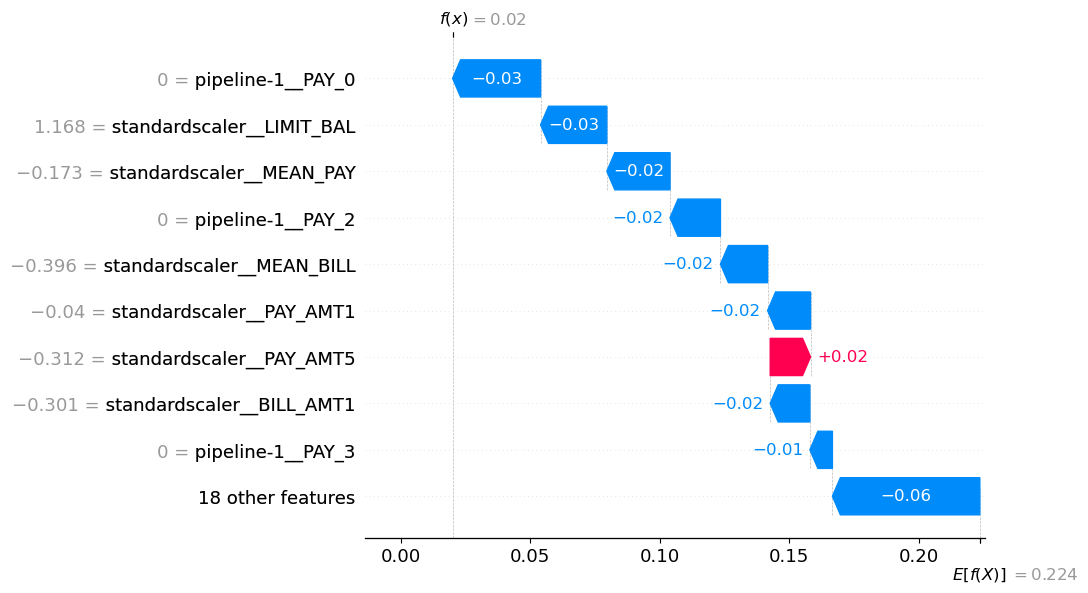

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from shap import TreeExplainer, Explanation
from shap.plots import waterfall, force#shap.plots.waterfall(exp[idx])

X_transformed = preprocessor.transform(X_train)
feature_names = forest_pipe.named_steps["columntransformer"].get_feature_names_out()

explainer = shap.TreeExplainer(forest_pipe.named_steps["randomforestclassifier"])

limits = range(1)
sv = explainer(X_transformed[limits])

exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X_transformed[limits], 
                  feature_names=feature_names)
waterfall(exp[0])

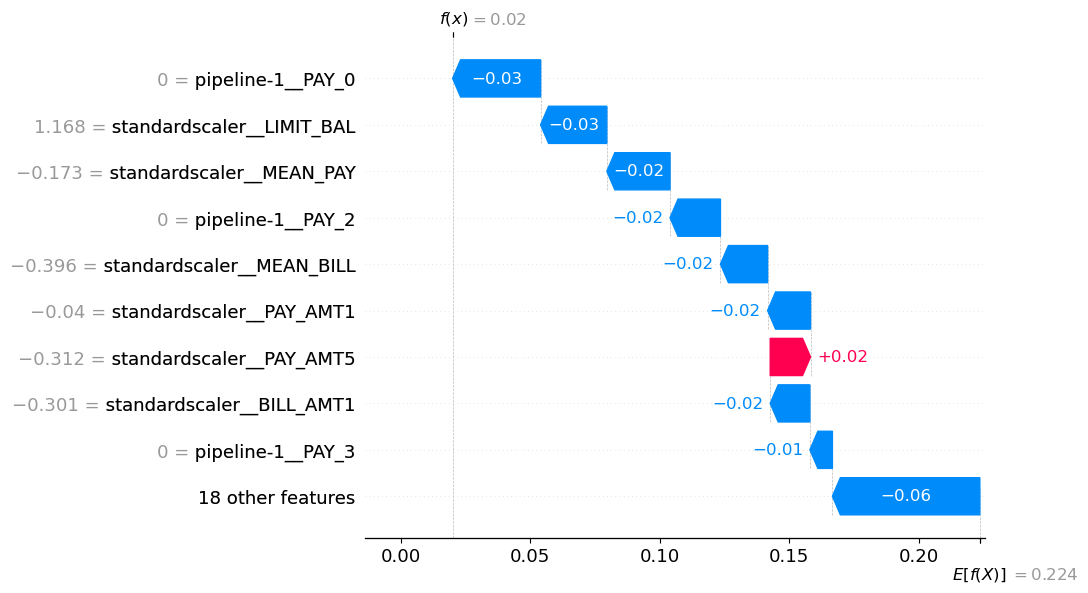

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from shap import TreeExplainer, Explanation
from shap.plots import waterfall#shap.plots.waterfall(exp[idx])


feature_names = forest_pipe.named_steps["columntransformer"].get_feature_names_out()

explainer = shap.TreeExplainer(forest_pipe.named_steps["randomforestclassifier"])

limits = range(100)
sv = explainer(X_transformed[limits])

exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X_transformed[limits], 
                  feature_names=feature_names)
waterfall(exp[0])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

The best performing model was the DecisionTree classifier with max_depth 4, and on the test data, it scores 0.821 on accuracy. There doesn't seem to be much over optimization on the validation data, seeing how it actually had better test score than validation score, so I trust it as well as you really can trust a model trained this quickly.

In terms of the SHAP force plot, the key collumns seem to be different. The ones that matter most are now Pay 0 and mean pay, rather than pay0 and limit_bal. what this means is that in this case, a well below average mean payment makes the model think it's more likely to default, but an overpayment on their last payment (represented by a negative pay 0), makes the model think the example is less likely to default. Again, makes sense. If someon overpaid last time, they're probably in good finacial health. I'd caution against taking the negative score on a low mean payment too seriously. On average, it may be a bad sign, but it could also be just that this person doesn't spend much and is perfectly good financial health.

In [35]:
final_tree = DecisionTreeClassifier(random_state = 123, max_depth = 4)

final_pipe = make_pipeline(preprocessor, final_tree)

final_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6',
                                                   'MEAN_PAY', 'MEAN_BILL']),
                                                 ('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(str...
                                                  ['EDUCATION', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categories=[[1,
                                                                             2]],
                                                                drop='if_binary',
                                                                dtype=<class 'int'>),
                                                  ['SEX']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['MARRIAGE'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, random_state=123))])

In [36]:
X_test["MEAN_BILL"] = X_test.loc[:, ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6' ]].mean(axis = 1)
X_test["MEAN_PAY"] = X_test.loc[:, ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]].mean(axis = 1)
shap.initjs()
final_pipe.score(X_test, y_test)

0.8207777777777778

In [37]:

X_transformed_test = preprocessor.transform(X_test)
feature_names = final_pipe.named_steps["columntransformer"].get_feature_names_out()

explainer = shap.TreeExplainer(final_pipe.named_steps["decisiontreeclassifier"])

limits = range(3, 4)
sv = explainer(X_transformed_test[limits])

exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X_transformed_test[limits], 
                  feature_names=feature_names)
force(exp[0])

In [38]:
#

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

This assignment was quite a twist for me. I honestly never expected the Decision Tree to come back and end up outperforming the random forest once hyperparameter optimization was done. 


Ideas I wish I had tried the gradient trees, I'm not sure if it would have been better, but it's an interesting style. Another thing I wish i had tried for the sake of interpretability would be to use sharp plots on a bunch of examples, and calculate the sharp score as a function of a given collumn as a function of the value (i.e., maybe -1 for limit_bal gives a negative shap score, while +1 for limit_bal gives a positive shap score, and we'd see a nice linear trend). I'd especially be interested in seeing any non-linear relationships; Maybe very large mean payments and very small mean payments both increase risk of default, for instance.

In [39]:
acc_model = dict()

models = ['dummy', 'out-of-box Random Forest', 'Random Forest With Feature Selection', 'Random Forest with Hyperparameter Tuning', "Decision Tree with HyperParameter Tuning (Final)", 'Test']

scores = [.777, 0.814, 0.816, 0.818, 0.820, 0.820]


df_res = pd.DataFrame({
    'Model': models,
    'Score': scores
})

# Display the table
df_res

,Model,Score
0,dummy,0.777
1,out-of-box Random Forest,0.814
2,Random Forest With Feature Selection,0.816
3,Random Forest with Hyperparameter Tuning,0.818
4,Decision Tree with HyperParameter Tuning (Final),0.820
5,Test,0.820


<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

I honestly think the biggest takeaway here is the balance of time. It's something I'd heard, but I never really took it seriously until this exam. Getting the models to run was honstly the easy part. The hard part was trying to clean up all the data, especially all the parts that didn't make sense. Why for intance, could PAY be negative numbers (it's because you can overpay your bill, apparently). But yeah, once that cleaning was done, running the models, again, was the easy, brainless part.

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)